# Phas Problem

在本notebook中，我们希望考虑如下情景：对于一个连续演化信号，我们间断重复测量，测量时间t0，间隔时间t1.之后我们希望通过傅里叶变换获取功率谱线。出于效率的考虑，我们希望利用fft来做傅里叶变换；然而fft的频率分辨率和时域长度成反比，所以这使得我们希望将N此测量的结果首尾相接组合成一个长时间序列（长度为Nt0），但是由于不同测量之间存在着时间间隔t1，这导致不同测量的限号之间存在相位差，具体来讲，对于频率为f的分量，这一相位差为ft1.此时，我们再进一步假设我们关心的分量频率$f_tar$>>1/t0(在我们的情况下$t0\approx0.1s$),所以在数学上来讲，我们对在0到t0内的fourier intergration已经可以近似出该分量的系数$a_tar$了，则我们记$\int^{t3}_{0}signal(t)cos(w_mt)dt = a_m$,则$\int^{Nt3}_{0}signal(t)cos(w_mt)dt = a_m\sum^{N-1}_{k=0}(\exp(-iw_mt1))/N$.所以我们可以知道，我们对于这一首尾相接序列的fft得到的变换谱实际上是真实谱线乘以一个随频率变化的缩放因子$s(w_m) = (\exp(-iw_mt1))/N$$


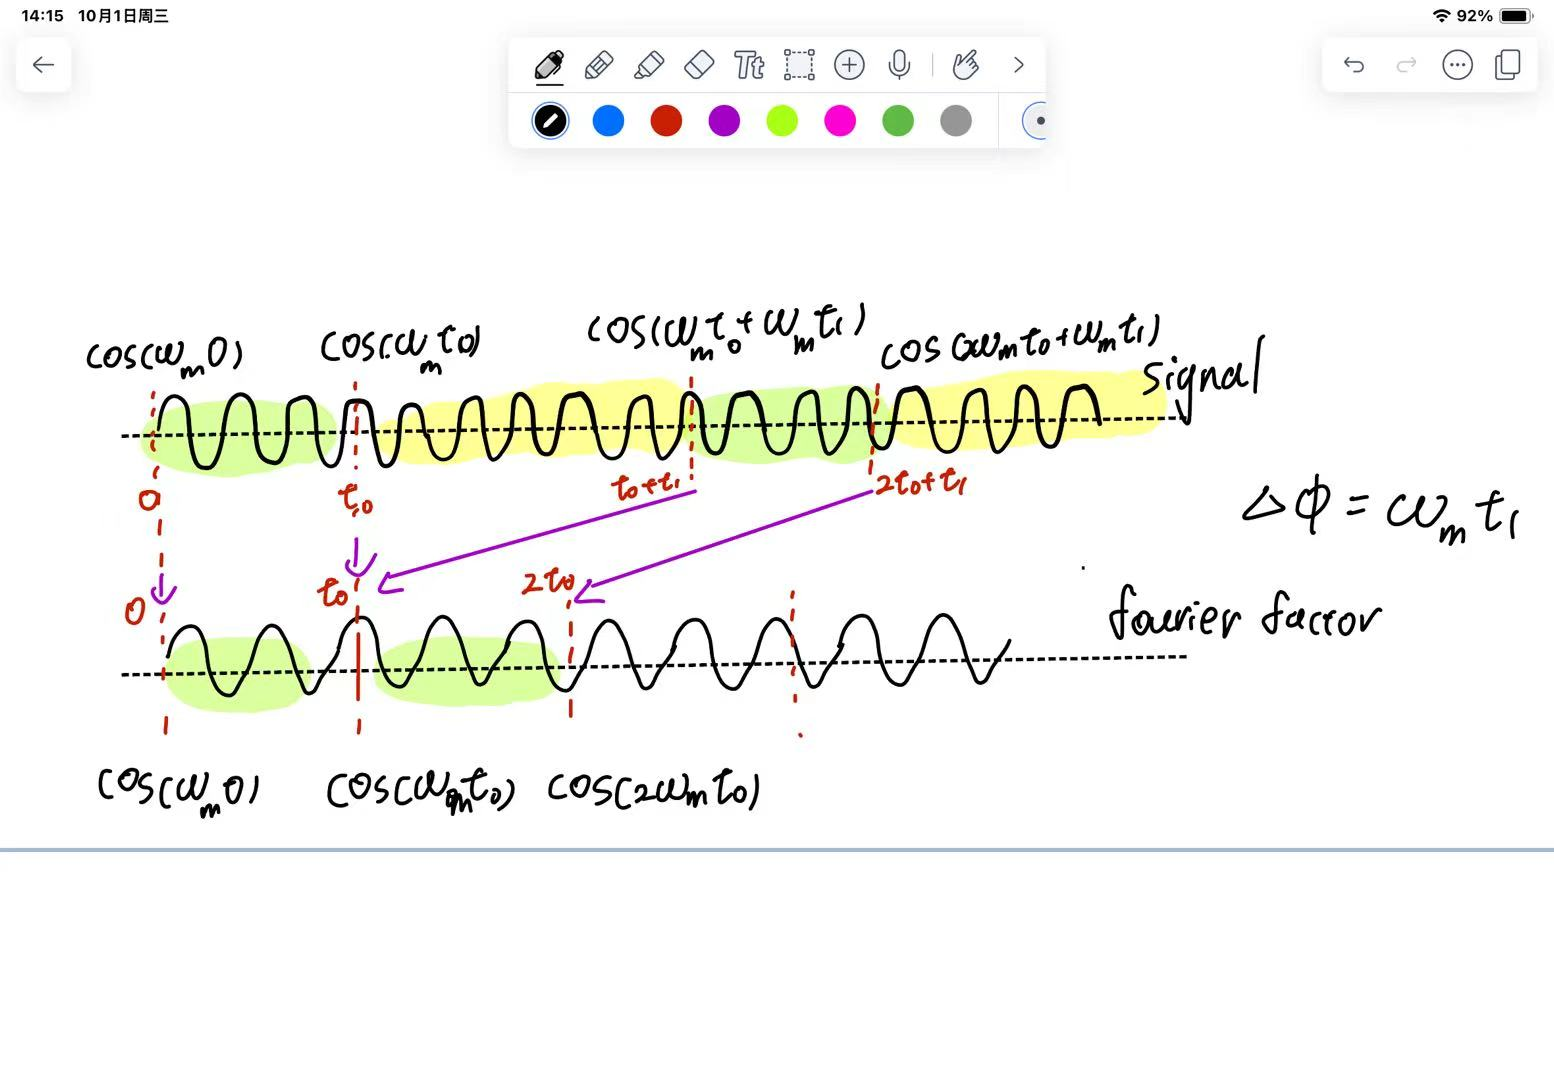



我们假设我们重复测量次数N=100，单次测量内采样率f=1000Hz，t0 = 0.1s，t2 = 1s。则如果我们做fft，我们角频率形如$2\pi k/(Nt0) = 2\pi*k/10$,其中k属于[0,f*N*t0-1]

In [ ]:
import numpy as np
import math

def scaling_factor_even(w,N,t1):
    theta = w*t1
    denominator1 = np.round(theta)-theta
    denominator2 = np.round(theta*2)-theta*2
    
    # 使用 numpy.where 来处理数组条件判断
    # 或者使用 a.any() 来检查是否有任何元素满足条件
    result = np.where(denominator1 == 0, 
                      1,  # 如果分母为0，返回1
                      np.where(denominator2 == 0, 
                               0,  # 如果分母为0，返回1/N
                               np.cos((N-1)*theta*np.pi)*np.sin(theta*np.pi*N)/np.sin(theta*np.pi)/N))
    return result




def scaling_factor_odd(w,N,t1):
    theta = w*t1
    denominator1 = np.round(theta)-theta
    denominator2 = np.round(theta*2)-theta*2
    
    # 使用 numpy.where 来处理数组条件判断
    # 或者使用 a.any() 来检查是否有任何元素满足条件
    result = np.where(denominator1 == 0, 
                      1,  # 如果分母为0，返回1
                      np.where(denominator2 == 0, 
                               1/N,  # 如果分母为0，返回1/N
                              np.cos((N-1)*theta*np.pi)*np.sin(theta*np.pi*N)/np.sin(theta*np.pi)/N))
    return result


[1.         0.9351795  0.75580382 ... 0.75580382 0.9351795  1.        ]


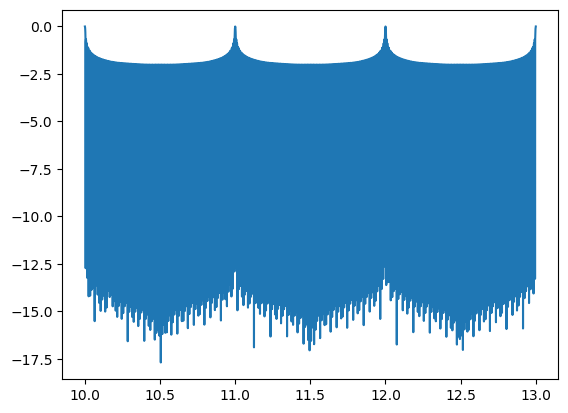

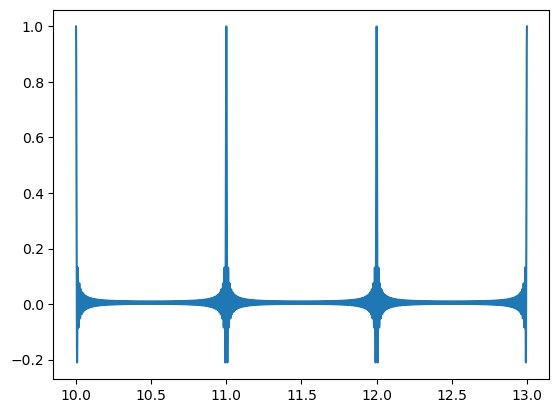

In [130]:

f = np.linspace(10,13,3001)

s = scaling_factor_odd(f,101,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log10(np.abs(s)))
plt.show()
plt.plot(f,s)

[1.         0.93644112 0.76027168 ... 0.76027168 0.93644112 1.        ]


C:\Users\top_c\AppData\Local\Temp\ipykernel_35368\860282872.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f,np.log10(np.abs(s)))


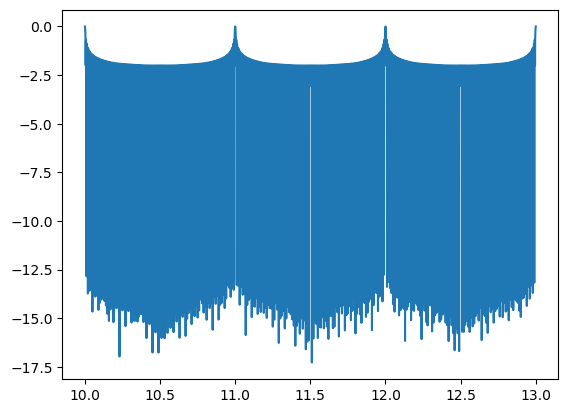

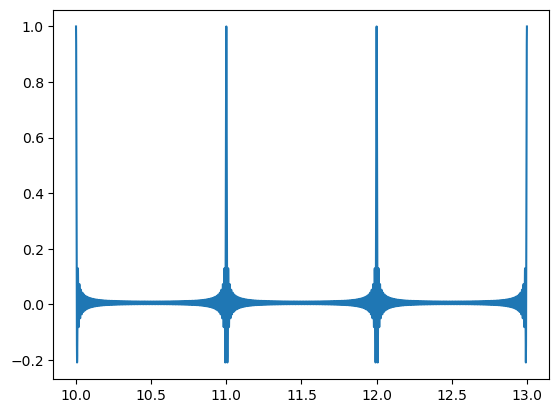

In [131]:

f = np.linspace(10,13,3001)

s = scaling_factor_even(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log10(np.abs(s)))
plt.show()
plt.plot(f,s)

[5.88617218e-15 7.23684946e-05 1.53284871e-04 ... 1.53284871e-04
 7.23684946e-05 8.11246744e-15]


C:\Users\top_c\AppData\Local\Temp\ipykernel_35368\2646187060.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(f,np.log(np.abs(s)))


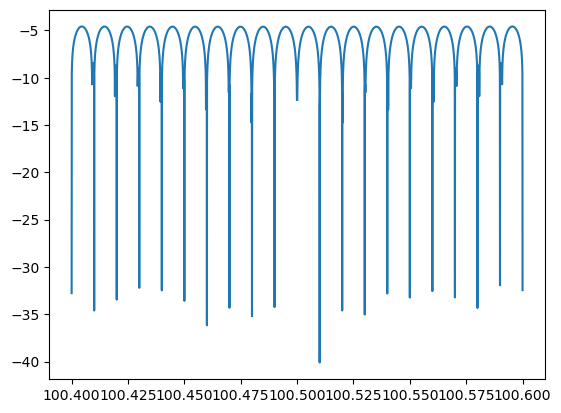

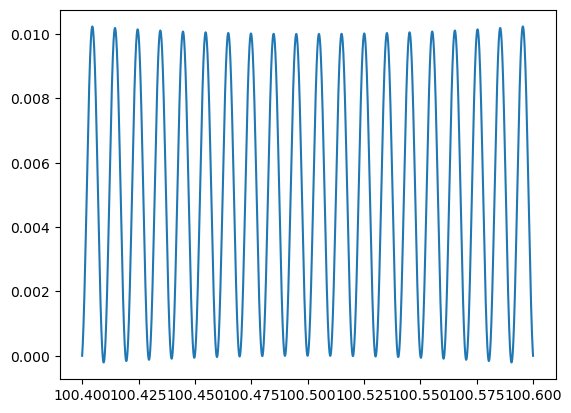

In [132]:

f = np.linspace(100.4,100.6,3001)

s = scaling_factor_even(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[ 4.35916700e-14 -2.13770227e-04 -4.22537925e-04 ... -9.57414262e-04
 -4.81153154e-04 -1.64557770e-14]


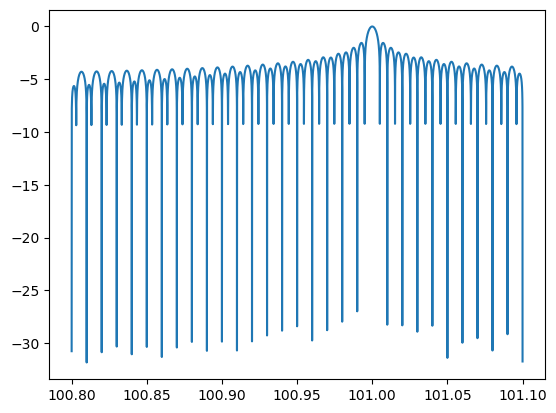

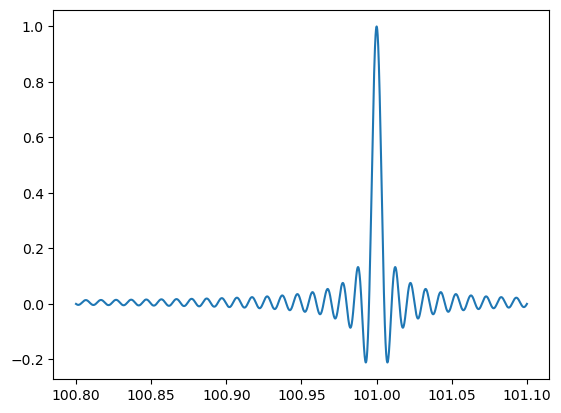

In [134]:

f = np.linspace(100.8,101.1,6001)

s = scaling_factor_even(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[1.         0.93644112 0.76027168 ... 0.76027168 0.93644112 1.        ]


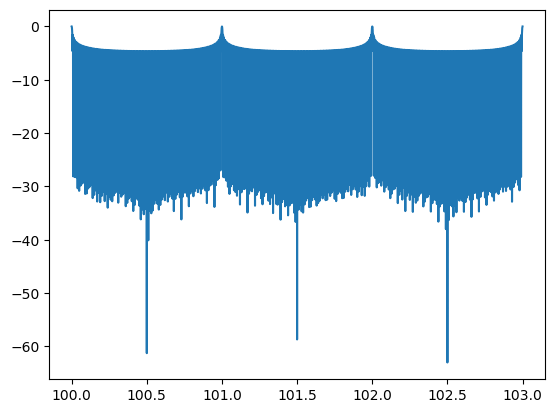

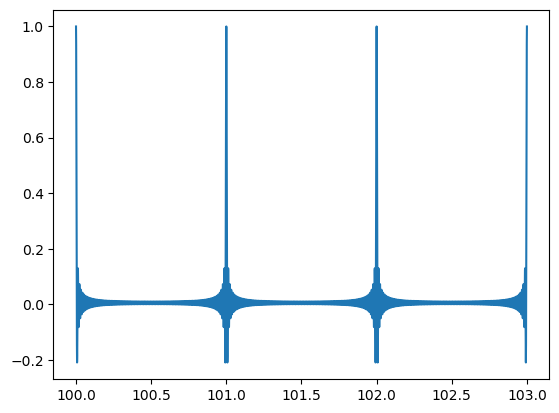

In [136]:

f = np.linspace(100,103,3001)

s = scaling_factor(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[1.         0.93644112 0.76027168 ... 0.76027168 0.93644112 1.        ]


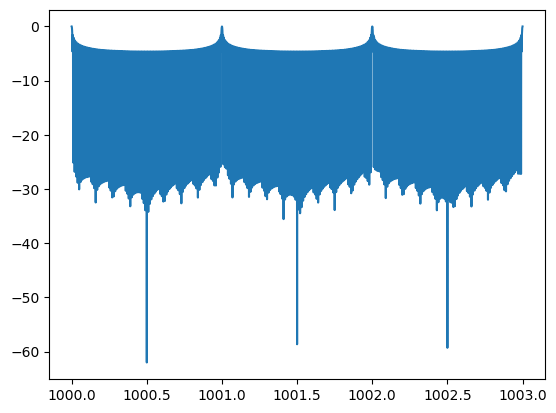

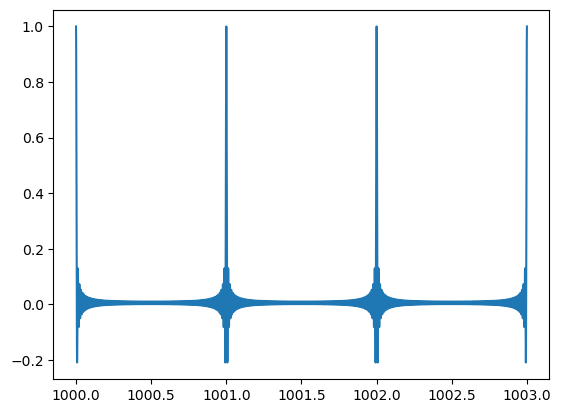

In [91]:

f = np.linspace(1000,1003,3001)

s = scaling_factor(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[1.         0.93644112 0.76027168 ... 0.76027168 0.93644112 1.        ]


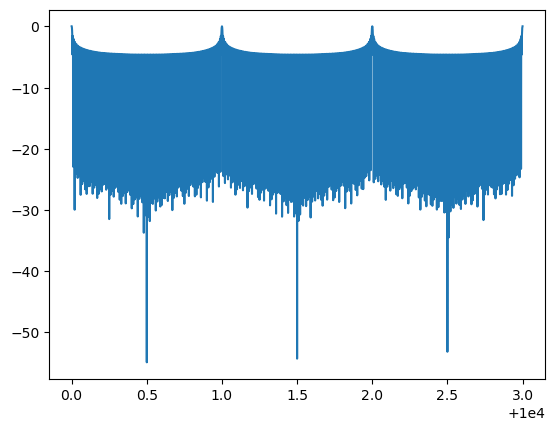

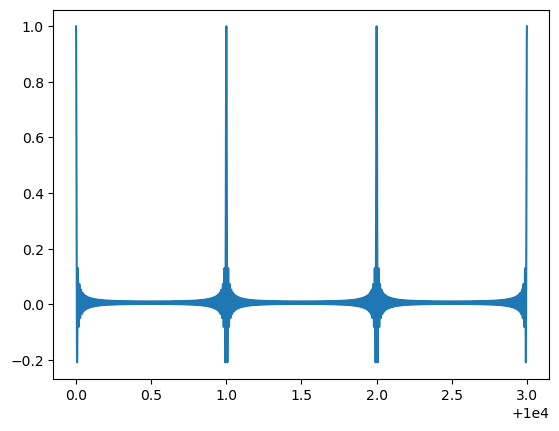

In [90]:

f = np.linspace(10000,10003,3001)

s = scaling_factor(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[7.80772297e-13 8.45887712e-04 6.50511254e-04 ... 6.50511254e-04
 8.45887712e-04 2.76143885e-13]


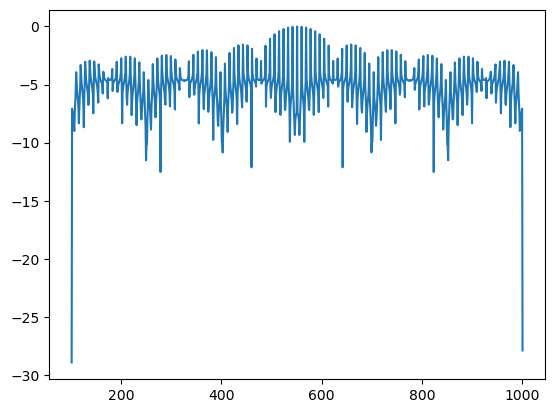

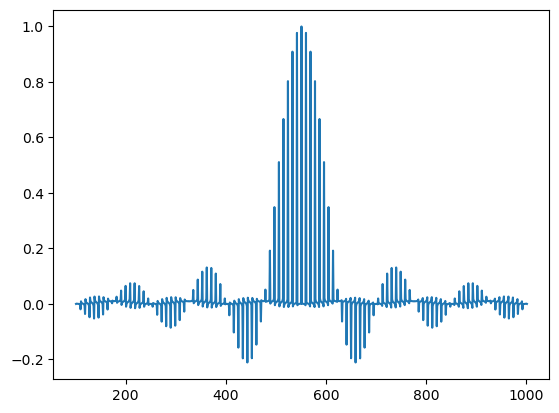

In [139]:

f = np.linspace(1000.97,101.03,1001)

s = scaling_factor_even(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)

[1.         0.9928141  0.97144306 ... 0.97144306 0.9928141  1.        ]


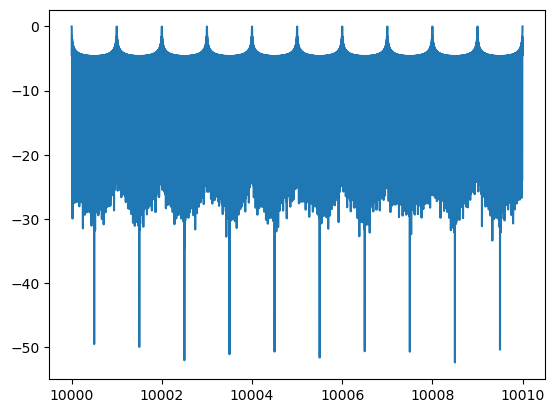

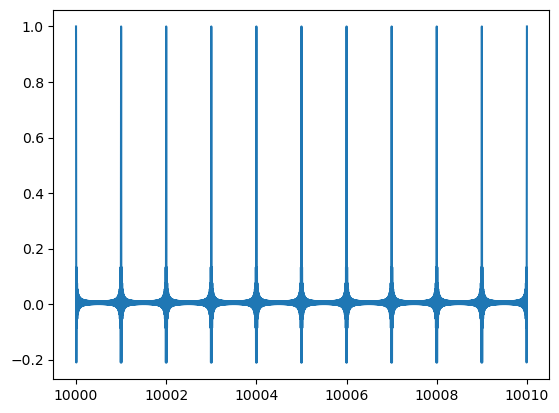

In [145]:

f = np.linspace(10000,10010,30001)

s = scaling_factor(f,100,1)

print(s)




import matplotlib.pyplot as plt
plt.plot(f,np.log(np.abs(s)))
plt.show()
plt.plot(f,s)


这个filter因子在0周围震荡，震荡的频率为其所在的频率（？），现在我们关心这一因子作用在我们信号上面的结果

C:\Users\top_c\AppData\Local\Temp\ipykernel_35368\2725928734.py:12: RuntimeWarning: invalid value encountered in divide
  sig_recovered = sig_filtered/s


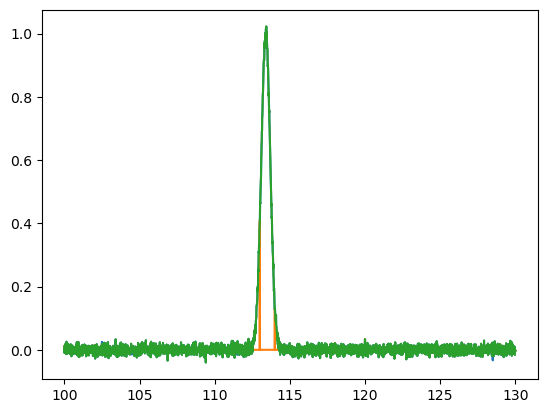

C:\Users\top_c\AppData\Local\Temp\ipykernel_35368\2725928734.py:21: RuntimeWarning: divide by zero encountered in log
  plt.plot(f,np.log(np.abs(s*sig)))


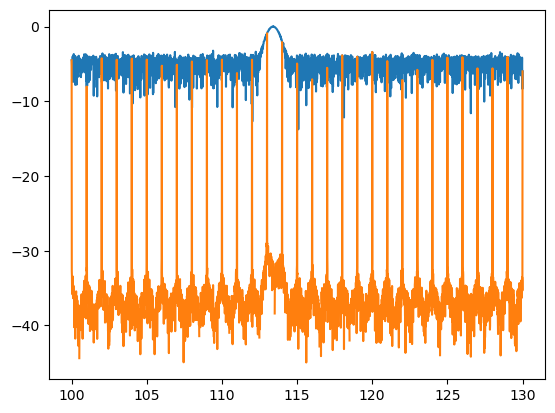

In [156]:
def gaussian_signal(f,f0,sigma):
    return np.exp(-(f-f0)**2/(2*sigma**2))

f = np.linspace(100,130,3001)

sig = gaussian_signal(f,113.4,0.3)+np.random.randn(3001)*0.01

s = scaling_factor_even(f,100,1)

sig_filtered = s*sig

sig_recovered = sig_filtered/s

plt.plot(f,sig)
plt.plot(f,sig_filtered)
plt.plot(f,sig_recovered)

plt.show()

plt.plot(f,np.log(np.abs(sig)))
plt.plot(f,np.log(np.abs(s*sig)))
# plt.plot(f,np.log(np.abs(sig_recovered)))
plt.show()






Ok,我现在开始担心，如果直接首尾相接数据，然后fft，再还原，这个误差会非常大，因为缩放因子的变换太大了。所以这个误差太大了，所以不如我们在做fft的时候就把系数修正了？或许我们用不了fft了，直接在小区域内用dft？

anyway，要验证这个判断，我们直接手动生成一系列加噪声的原始ringdown数据，然后看这个处理方法是不是够好。


In [167]:
def increasing_noise(t,tao,n0):
    return n0*(1-np.exp(-t/tao))*np.random.randn(np.shape(t)[0])

def ringdown_signal(t,f0,tao,s0):
    return s0*np.exp(-(t)/tao)*np.cos(2*np.pi*f0*t)


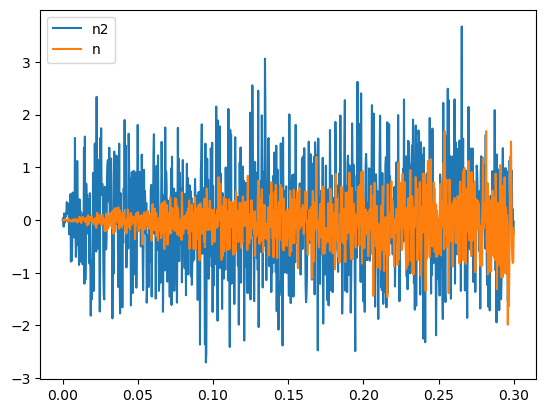

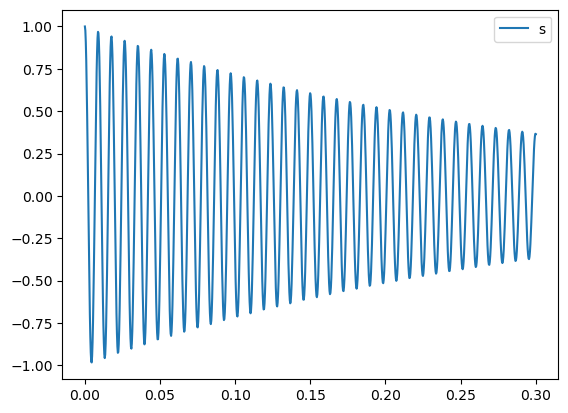

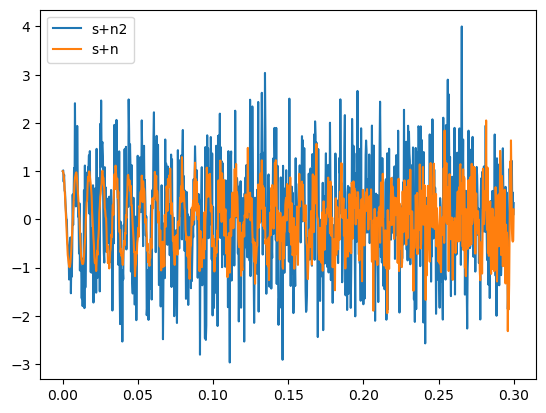

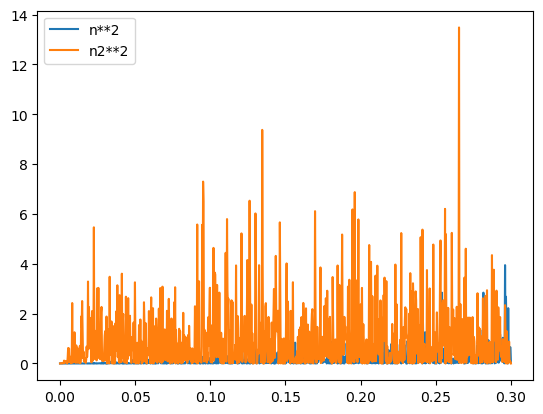

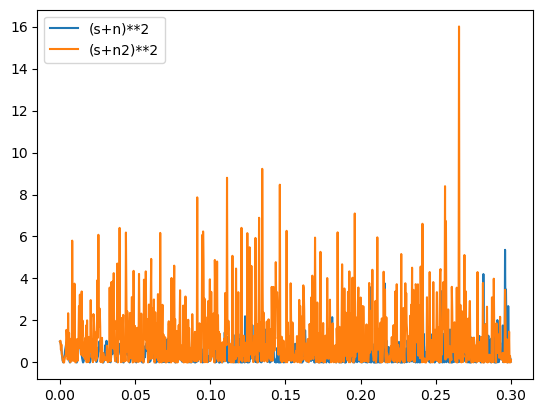

In [176]:
t = np.linspace(0,0.3,1000)
n = increasing_noise(t,0.3,1)
n2 = increasing_noise(t,0.01,1)
s = ringdown_signal(t,113.4,0.3,1)

plt.plot(t,n2,label='n2')
plt.plot(t,n,label='n')
plt.legend()
plt.show()

plt.plot(t,s,label='s')
plt.legend()
plt.show()


plt.plot(t,s+n2,label='s+n2')
plt.plot(t,s+n,label='s+n')
plt.legend()
plt.show()


plt.plot(t,n**2,label='n**2')
plt.plot(t,n2**2,label='n2**2')
plt.legend()
plt.show()

plt.plot(t,(s+n)**2,label='(s+n)**2')
plt.plot(t,(s+n2)**2,label='(s+n2)**2')
plt.legend()
plt.show()




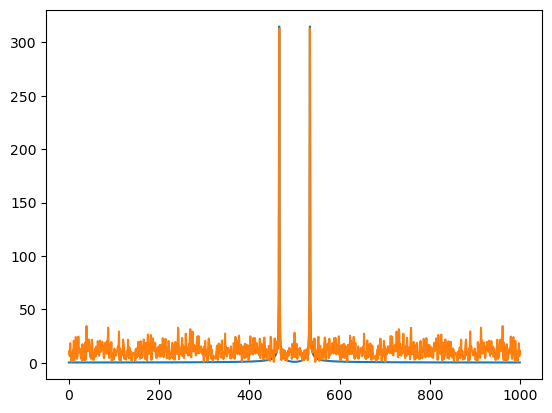

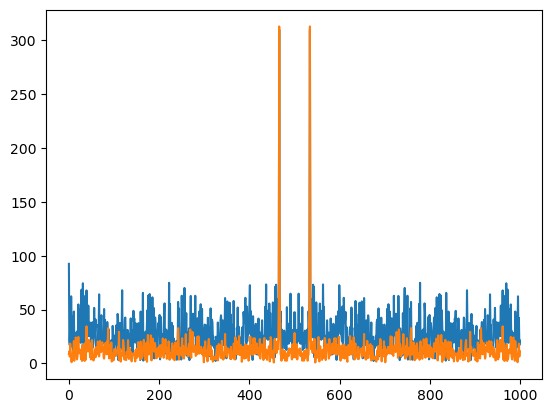

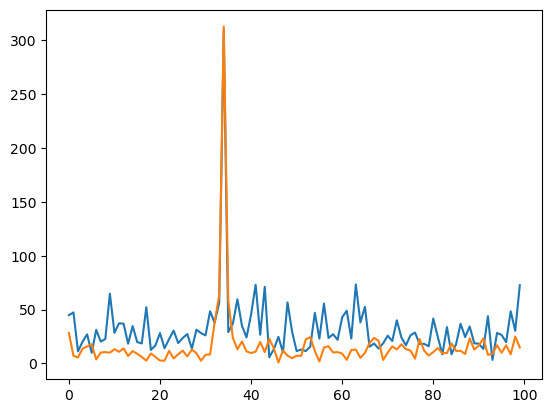

In [181]:
s_f = np.fft.fftshift(np.fft.fft(s))
sn_f = np.fft.fftshift(np.fft.fft(n+s))


plt.plot(np.abs(s_f))
plt.plot(np.abs(sn_f))
plt.show()


plt.plot(np.abs(sn2_f))
plt.plot(np.abs(sn_f))
plt.show()

plt.plot(np.abs(sn2_f[500:600]))
plt.plot(np.abs(sn_f[500:600]))
plt.show()



Ok so for singal measurement, for noise is supressed, 


# might need to find how much we suppressed, I would assume it is the average of 1-exp(t/tao), which is exp(-tm/tao)

In [189]:
sig = np.array([])
for i in range(100):
    t = np.linspace(0,0.3,1000)
    n = increasing_noise(t,0.3,1)
    s = ringdown_signal(t,163.4,0.3,1)

    s_real = s+n
    sig = np.append(sig,s_real)


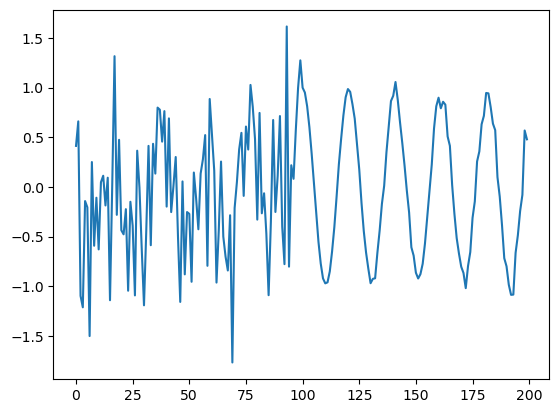

In [191]:
plt.plot(sig[900:1100])
plt.show()



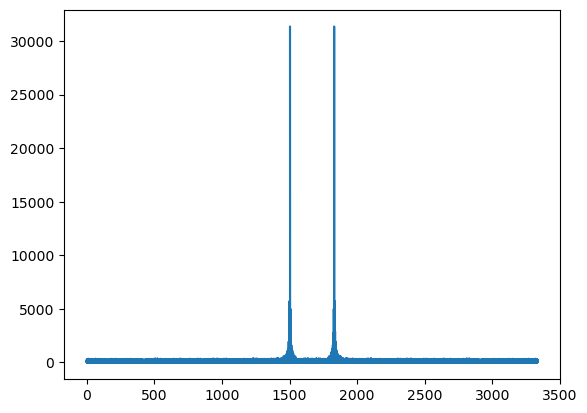

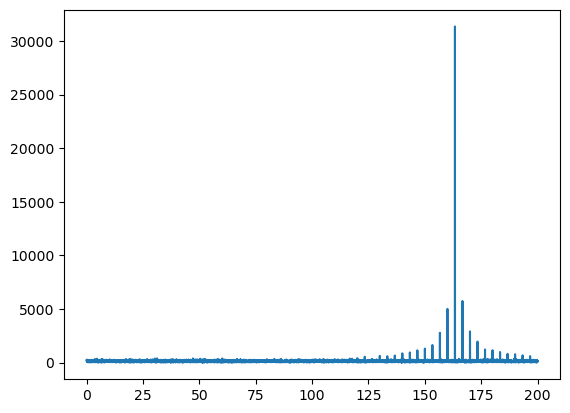

In [ ]:
f = np.linspace(0,1000/0.3,1000*100)

s_f = np.fft.fftshift(np.fft.fft(sig))

plt.plot(f,np.abs(s_f))
plt.show()


plt.plot(f[50000:56000]-1000/0.3/2,np.abs(s_f[50000:56000]))
plt.show()




Here we go, this is the filter factor we see

In [ ]:
def scaling_factor_even(w,N,t1):
    theta = w*t1
    denominator1 = np.round(theta)-theta
    denominator2 = np.round(theta*2)-theta*2
    
    # 使用 numpy.where 来处理数组条件判断
    # 或者使用 a.any() 来检查是否有任何元素满足条件
    result = np.where(denominator1 == 0, 
                      1,  # 如果分母为0，返回1
                      np.where(denominator2 == 0, 
                               0,  # 如果分母为0，返回1/N
                               np.cos((N-1)*theta*np.pi)*np.sin(theta*np.pi*N)/np.sin(theta*np.pi)/N))
    return result

In [200]:
scal = scaling_factor_even(f,100,-0.3)

C:\Users\top_c\AppData\Local\Temp\ipykernel_35368\627586913.py:15: RuntimeWarning: invalid value encountered in divide
  np.cos((N-1)*theta*np.pi)*np.sin(theta*np.pi*N)/np.sin(theta*np.pi)/N))


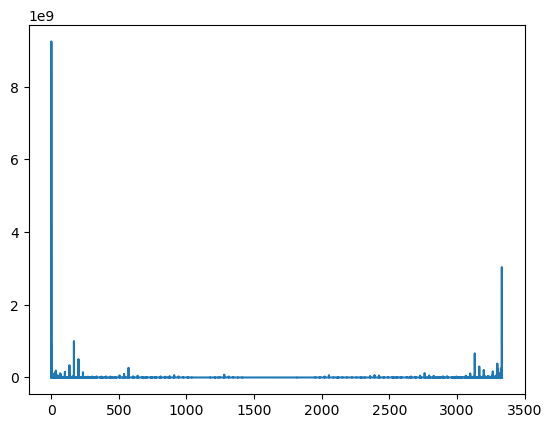

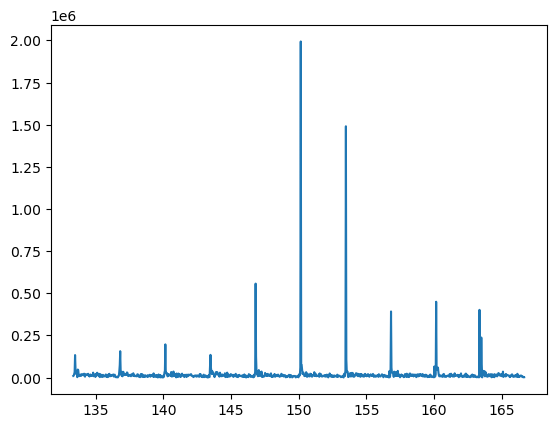

In [204]:
s_f_recovered = s_f/scal

plt.plot(f,np.abs(s_f_recovered))
plt.show()


plt.plot(f[54000:55000]-1000/0.3/2,np.abs(s_f_recovered[54000:55000]))
plt.show()

ok, this is the problem I am talking about, the fliter coefficient is too small, so we have to fix this when we are doing fft, maybe we should develope another version of fft? Or how about we do dft.

In [ ]:
sig = np.array([])
N=100

for i in range(N):
    t = np.linspace(0,0.3,1000)
    n = increasing_noise(t,0.3,1)
    s = ringdown_signal(t,163.4,0.3,1)

    s_real = (s+n)*np.exp(-1j*2*np.pi*163.4*0.3*i)
    sig = np.append(sig,s_real)

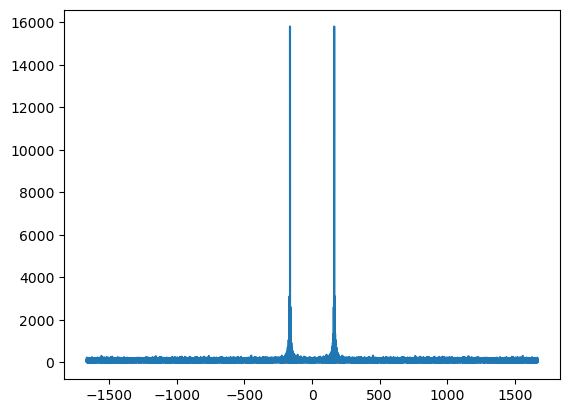

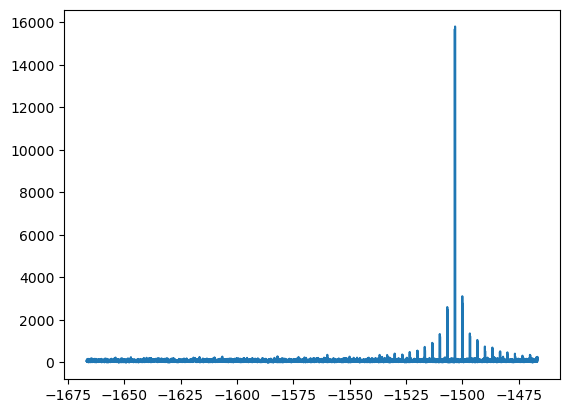

In [214]:
f = np.linspace(-1000/0.3/2,1000/0.3/2,1000*100)

s_f = np.fft.fftshift(np.fft.fft(sig))

plt.plot(f,np.abs(s_f))
plt.show()


plt.plot(f[50000:56000]-1000/0.3/2,np.abs(s_f[50000:56000]))
plt.show()